# Polarized semi-classical cavity-QED model

An extended semi-classical model for polarized quantum dot cavity-QED and application to single photon sources

H.J. Snijders, D.N.L. Kok, M.F. van de Stolpe, J. A. Frey, J. Norman, A. C. Gossard, J. E. Bowers, M.P. van Exter, D. Bouwmeester, and W. Löffler

https://arxiv.org/abs/1811.10571


In [1]:
# %matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper functions
I2 = np.array([[1,0],[0,1]]) # identity
JH = np.array([[1,0],[0,0]]) # linear polarizer along H
JV = np.array([[0,0],[0,1]]) # linear polarizer along V
JR = 0.5*np.array([[1,1j],[-1j,1]]) # right circular polarizer R
JL = 0.5*np.array([[1,-1j],[1j,1]]) # left circular polarizer L

def f_phase_qd(ndet_qd, C):
    return 2*C/(1-(1j*ndet_qd))

def f_phase_cav(ndet_cav):
    return 2*1j*ndet_cav 

def f_ndet_qd(f_qd, f_laser, gamma):
    return 2*np.pi*(f_laser - f_qd)/gamma

def f_ndet_cav(f_cav, f_laser, kappa):
    return 2*np.pi*(f_laser - f_cav)/kappa

def f_rotm(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array(((c,-s), (s, c)))

def X_fun(f_laser): # neutral QD, adapt for others!
    return JH*f_phase_qd(f_ndet_qd(f_qd_x, f_laser, gamma), C) + JV*f_phase_qd(f_ndet_qd(f_qd_y, f_laser, gamma), C)

def f_t_tot(eta_out, f_laser, f_cav_h, f_cav_v, kappa, theta_qd, emptycav):
    ndet_cav_h = f_ndet_cav(f_cav_h, f_laser, kappa)
    ndet_cav_v = f_ndet_cav(f_cav_v, f_laser, kappa)
    if not emptycav:
        X = X_fun(f_laser)
    else:
        X = I2*0.0
        
    return eta_out*np.linalg.inv(
        I2
        - np.array([[f_phase_cav(ndet_cav_h),0],[0,f_phase_cav(ndet_cav_v)]])
        + np.dot(f_rotm(-theta_qd), np.dot(X, f_rotm(theta_qd)))
    )

def f_transmission(e_in, e_out, t_tot): # intensity, e_* are 2-element complex numpy arrays or lists
    # conjugate output jones vector (cc)!
    return np.absolute(np.dot(np.array(np.conj(e_out)).reshape((1,2)), np.dot(t_tot, np.array(e_in).reshape((2,1)))))**2

def f_calcall(flaser=None):
    fax = np.array([flaser]) if (flaser != None) else np.arange(-20,20,0.05)
    ttqd = np.zeros(len(fax)) # with QD
    ttec = np.zeros(len(fax)) # empty cavity
    for i in range (len(fax)):
        t_tot = f_t_tot(eta_out, fax[i], f_cav_h, f_cav_v, kappa, theta_qd, False)
        ttqd[i] = f_transmission(e_in, e_out, t_tot)
        t_tot = f_t_tot(eta_out, fax[i], f_cav_h, f_cav_v, kappa, theta_qd, True)
        ttec[i] = f_transmission(e_in, e_out, t_tot)
    if (flaser is None):
        return [fax,ttqd,ttec]
    else:
        return [fax[0],ttqd[0],ttec[0]]

def f_plot(fax, ttqd, ttec, flaser=None):
    lw=4
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize('14')

    ax.plot(fax, ttqd, 'r-', lw=lw, label='With QD')
    ax.plot(fax, ttec, 'k-', lw=lw, label='Empty cavity')
    if flaser != None:
        ax.axvline(flaser, c="grey")
    ax.set_xlabel(r'$\Delta$f$_{L}$(GHz)', fontsize=14)
    ax.set_ylabel('Transmission intensity', fontsize=14)
    ax.set_xlim(-21,21)
    ax.set_ylim(-0.01,0.25)
    # ax.set_ylim(0, 0.025)
    plt.legend(prop={'size':14})
    plt.grid()


In [3]:
# common device parameters
kappa = 70.0; #total intensity damping of the cavity
gammaparallel = 2.0; # QD
puredeph = 0.0; # QD
gamma = gammaparallel/2.0 + puredeph; # QD
g = 10.0; # QD-mode coupling strength
C = g*g/(kappa*gamma); # cooperativity
eta_out = 1.0
f_cav_h = -5.0
f_cav_v = +5.0
theta_qd = 94.0/180*np.pi # angle QD transitions - cavity axes
print("gamma=",gamma," C=",C)

gamma= 1.0  C= 1.4285714285714286


<IPython.core.display.Javascript object>


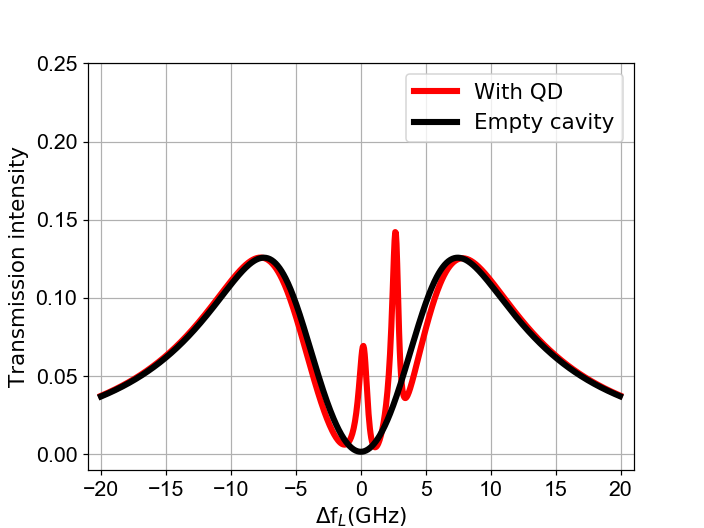

In [5]:
# uncomment the desired case!

##### 90Cross
# f_qd_x = -9.0
# f_qd_y = -11.0
# e_in = [0, 1] ; 
# e_out = [1, 0] ; 

##### 45circ
f_qd_x = 0.5
f_qd_y = 2.5
e_in = 1/np.sqrt(2)*np.array([1,1]) ; 
e_out = 1/np.sqrt(2)*np.array([1,1j])

##### optimal: note different QD splitting (experimental fact)
# f_qd_x = 1.0
# f_qd_y = -1.5
# e_in = [0.6572826941805521, 0.49806916841808485-0.5656028318547144j] ; 
# e_out = [0.6572826941805521, 0.49806916841808485+0.5656028318547144j] ; 

# calc & plot
[fax,ttqd,ttec] = f_calcall()
f_plot(fax,ttqd,ttec)
